# 1. 计算机程序的构造与解释

- 练习1: draw.cpp
- 练习2: for2while.cpp
- 练习3: copy-var.cpp

二分求平方根的可视化程序: 请见bisect.cpp

The approximate square root of 2 is 1.4142135381698608


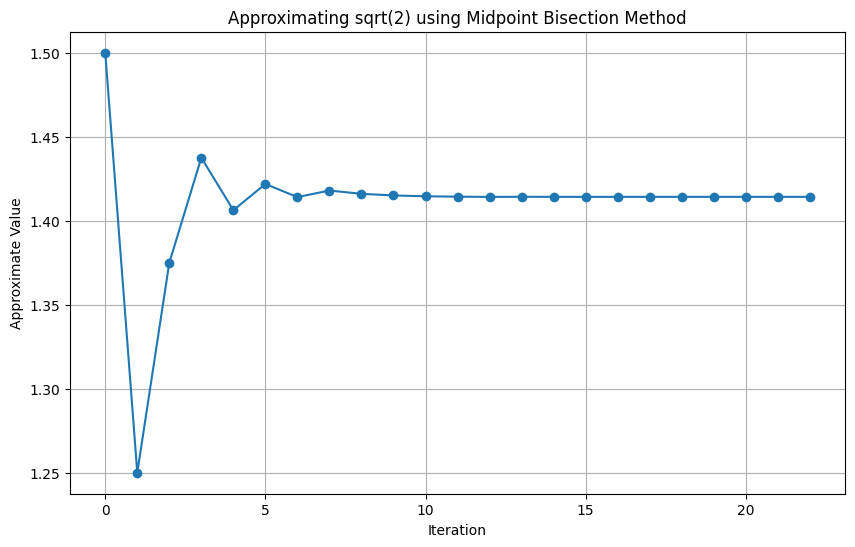

In [4]:
import matplotlib.pyplot as plt

def midpoint_bisection_sqrt(n, tolerance=1e-7):
    lower_bound = 0
    upper_bound = n
    midpoint = (lower_bound + upper_bound) / 2.0
    iterations = []

    while abs(midpoint**2 - n) > tolerance:
        if midpoint**2 < n:
            lower_bound = midpoint
        else:
            upper_bound = midpoint
        midpoint = (lower_bound + upper_bound) / 2.0
        iterations.append(midpoint)
    
    return midpoint, iterations

# 可视化函数
def visualize_iterations(n, iterations):
    x_values = range(len(iterations))
    y_values = iterations
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o')
    plt.title(f'Approximating sqrt({n}) using Midpoint Bisection Method')
    plt.xlabel('Iteration')
    plt.ylabel('Approximate Value')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    number = 2  # 要计算平方根的数
    tolerance = 1e-7  # 计算精度
    result, iteration_values = midpoint_bisection_sqrt(number, tolerance)
    print(f"The approximate square root of {number} is {result}")
    
    visualize_iterations(number, iteration_values)


递归函数调用的可视化图

The approximate square root of 25.0 is 5.000000004656613
Iterations: []


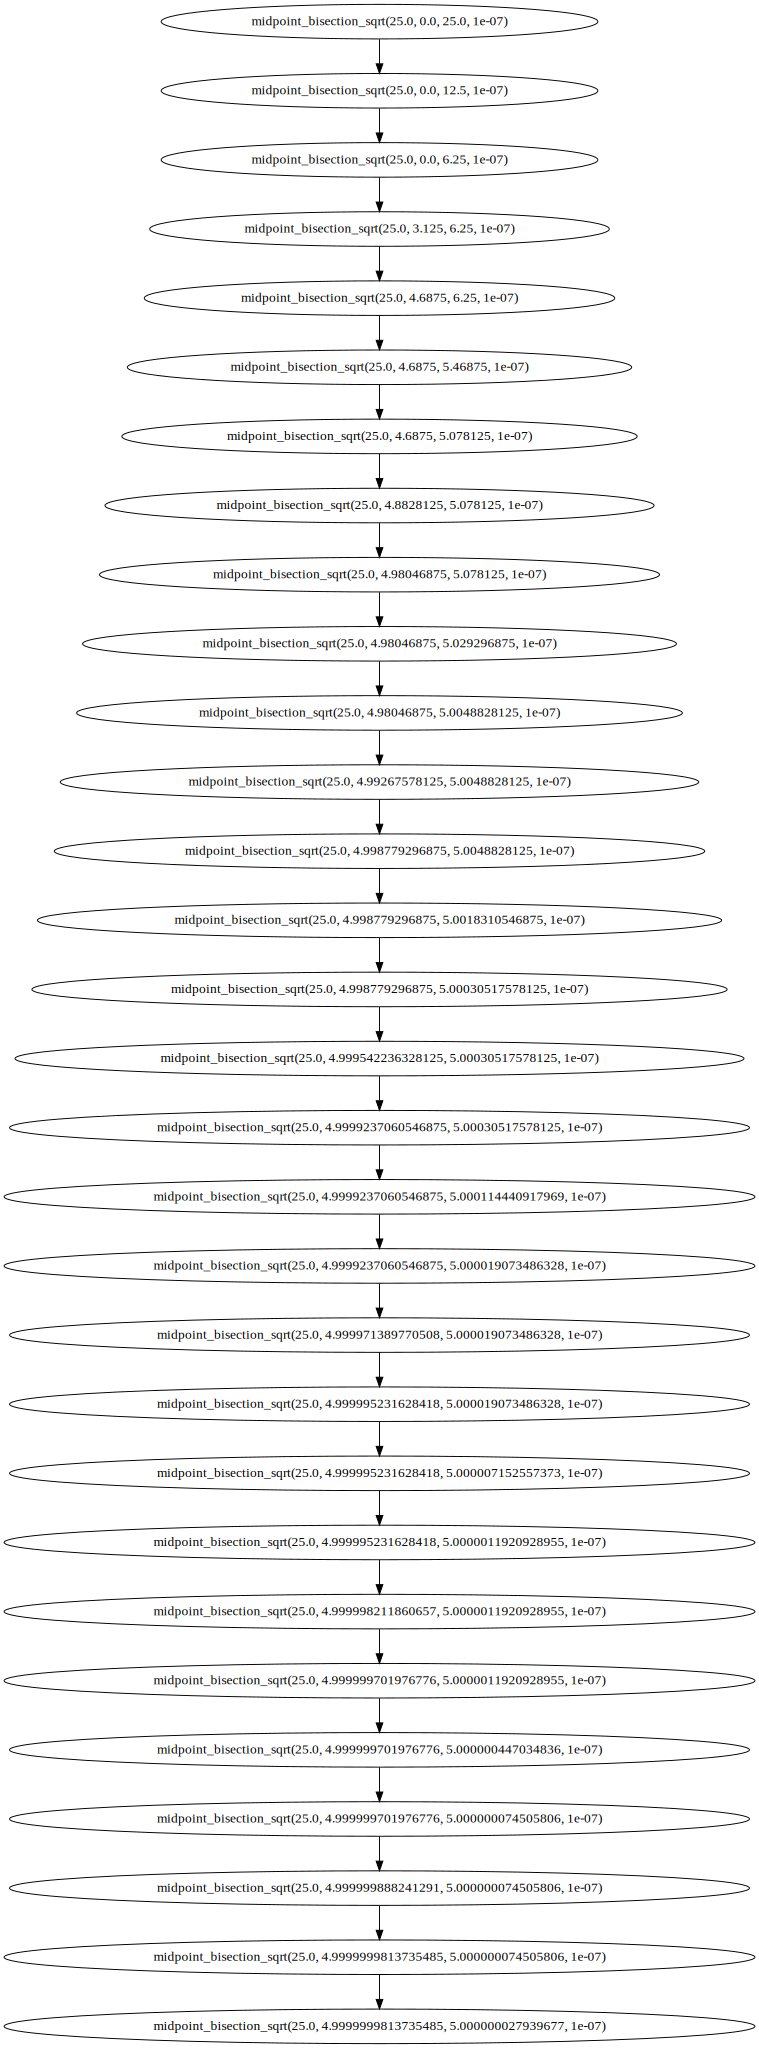

In [12]:
import graphviz
import uuid
from functools import wraps
from IPython.display import display

class CallVisualizer:
    def __init__(self):
        self.nodes = []
        self.edges = []
        self.current_call_id = None

    def record_call(self, func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            call_id = str(uuid.uuid4())
            parent_call_id = self.current_call_id
            self.current_call_id = call_id

            # 记录函数名称和参数
            args_repr = [repr(a) for a in args]
            kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]
            signature = ", ".join(args_repr + kwargs_repr)
            label = f"{func.__name__}({signature})"

            self.nodes.append((call_id, label))
            if parent_call_id:
                self.edges.append((parent_call_id, call_id))

            result = func(*args, **kwargs)

            self.current_call_id = parent_call_id
            return result

        return wrapper

    def visualize(self):
        dot = graphviz.Digraph()

        for node, label in self.nodes:
            dot.node(node, label)

        for edge in self.edges:
            dot.edge(*edge)

        display(dot)
        return dot

# 使用示例
if __name__ == "__main__":
    visualizer = CallVisualizer()

    @visualizer.record_call
    def midpoint_bisection_sqrt(n, lower_bound, upper_bound, tolerance):
        midpoint = (lower_bound + upper_bound) / 2.0

        if abs(midpoint * midpoint - n) <= tolerance:
            return midpoint

        if midpoint * midpoint < n:
            return midpoint_bisection_sqrt(n, midpoint, upper_bound, tolerance)
        else:
            return midpoint_bisection_sqrt(n, lower_bound, midpoint, tolerance)

    number = 25.0  # 要计算平方根的数
    tolerance = 1e-7  # 计算精度
    lower_bound = 0.0
    upper_bound = number
    iterations = []  # 存储每次迭代的中点值

    # 计算平方根并记录调用过程
    result = midpoint_bisection_sqrt(number, lower_bound, upper_bound, tolerance)

    print(f"The approximate square root of {number} is {result}")
    print("Iterations:", iterations)

    # 生成并显示调用过程图
    visualizer.visualize()


求阶乘的递归函数调用

The factorial of 5 is 120


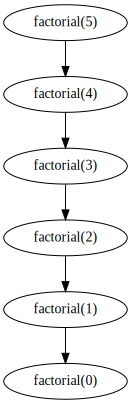

In [13]:
if __name__ == "__main__":
    visualizer = CallVisualizer()

    @visualizer.record_call
    def factorial(n):
        if n == 0:
            return 1
        else:
            return n * factorial(n - 1)

    number = 5  # 要计算阶乘的数

    # 计算阶乘并记录调用过程
    result = factorial(number)

    print(f"The factorial of {number} is {result}")

    # 生成并显示调用过程图
    visualizer.visualize()

The 5th Fibonacci number is 5


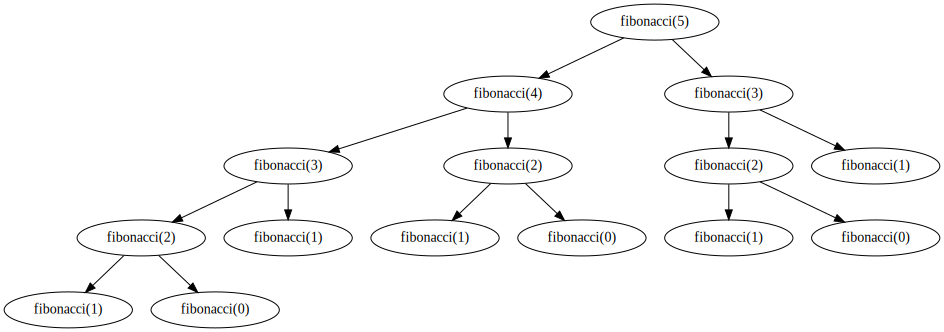

In [14]:
if __name__ == "__main__":
    visualizer = CallVisualizer()

    @visualizer.record_call
    def fibonacci(n):
        if n <= 0:
            return 0
        elif n == 1:
            return 1
        else:
            return fibonacci(n - 1) + fibonacci(n - 2)

    number = 5  # 要计算的斐波那契数列的项数

    # 计算斐波那契数并记录调用过程
    result = fibonacci(number)

    print(f"The {number}th Fibonacci number is {result}")

    # 生成并显示调用过程图
    visualizer.visualize()

换零钱问题. 另见coin-change. 

The number of ways to change 30 cents is 18


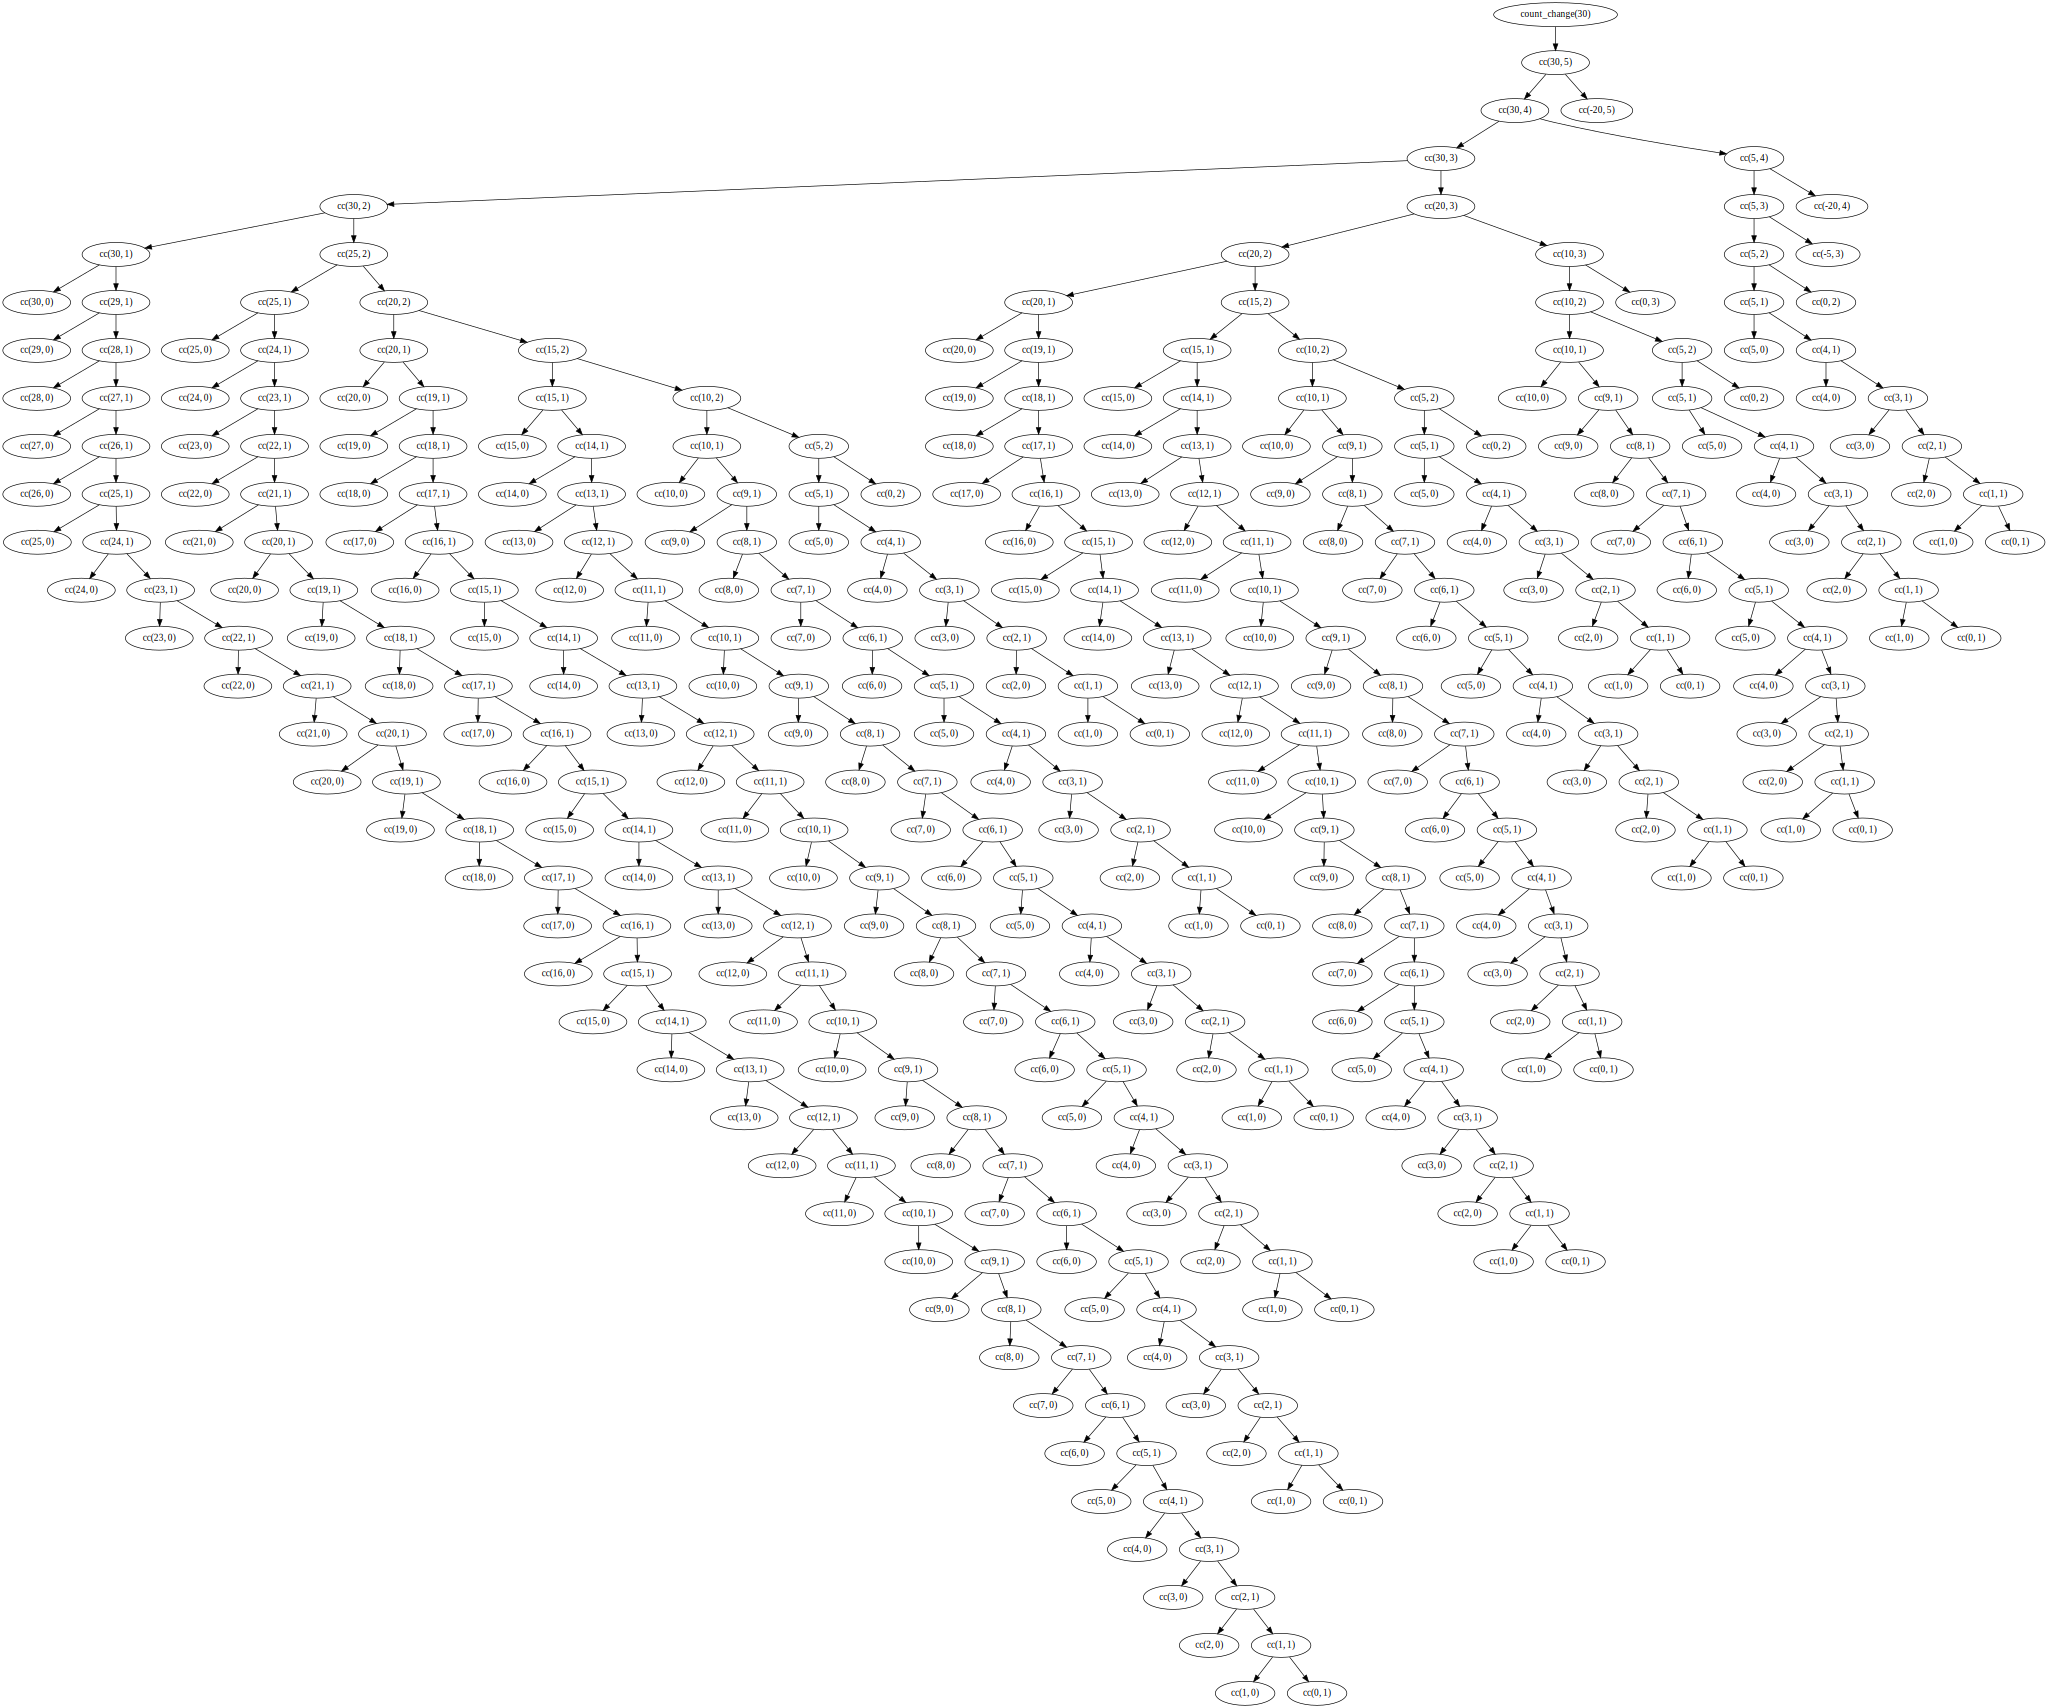

In [17]:
if __name__ == "__main__":
    visualizer = CallVisualizer()

    def first(k):
        if k == 1:
            return 1
        elif k == 2:
            return 5
        elif k == 3:
            return 10
        elif k == 4:
            return 25
        elif k == 5:
            return 50
        return 0

    @visualizer.record_call
    def cc(amount, kindOfCoins):
        if amount == 0:
            return 1  # 金额为0时，有1种换法（不需要硬币）
        if amount < 0 or kindOfCoins == 0:
            return 0  # 金额小于0或没有硬币种类时，没有换法
        return cc(amount, kindOfCoins - 1) + cc(amount - first(kindOfCoins), kindOfCoins)

    @visualizer.record_call
    def count_change(amount):
        return cc(amount, 5)  # 5种硬币

    amount = 30  # 1美元（100美分）
    result = count_change(amount)

    print(f"The number of ways to change {amount} cents is {result}")

    # 生成并显示调用过程图
    visualizer.visualize()

求最大公约数

The GCD of 48 and 18 is 6


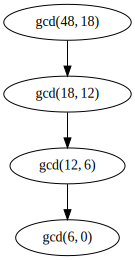

In [18]:
if __name__ == "__main__":
    visualizer = CallVisualizer()

    @visualizer.record_call
    def gcd(a, b):
        if b == 0:
            return a
        else:
            return gcd(b, a % b)

    a, b = 48, 18  # 要计算的两个数

    # 计算最大公约数并记录调用过程
    result = gcd(a, b)

    print(f"The GCD of {a} and {b} is {result}")

    # 生成并显示调用过程图
    visualizer.visualize()

Hanoi塔, 但是保留每一步

Initial state:
A: [3, 2, 1]
B: []
C: []

Move disk 1 from A to C
A: [3, 2]
B: []
C: [1]

Move disk 2 from A to B
A: [3]
B: [2]
C: [1]

Move disk 1 from C to B
A: [3]
B: [2, 1]
C: []

Move disk 3 from A to C
A: []
B: [2, 1]
C: [3]

Move disk 1 from B to A
A: [1]
B: [2]
C: [3]

Move disk 2 from B to C
A: [1]
B: []
C: [3, 2]

Move disk 1 from A to C
A: []
B: []
C: [3, 2, 1]



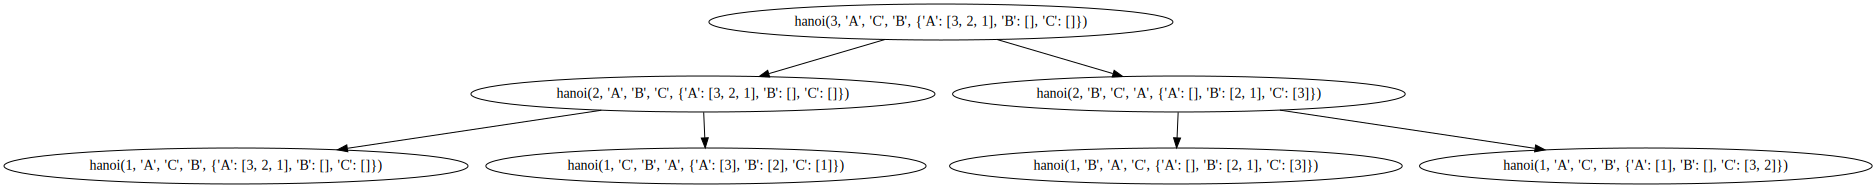

In [19]:
if __name__ == "__main__":
    visualizer = CallVisualizer()

    @visualizer.record_call
    def hanoi(n, source, target, auxiliary, towers):
        if n == 1:
            disk = towers[source].pop()
            towers[target].append(disk)
            print(f"Move disk {disk} from {source} to {target}")
            print_towers(towers)
            return

        hanoi(n - 1, source, auxiliary, target, towers)
        disk = towers[source].pop()
        towers[target].append(disk)
        print(f"Move disk {disk} from {source} to {target}")
        print_towers(towers)
        hanoi(n - 1, auxiliary, target, source, towers)

    def print_towers(towers):
        for peg in towers:
            print(f"{peg}: {towers[peg]}")
        print()

    # 初始化汉诺塔
    n = 3  # 盘子数量
    towers = {
        'A': list(range(n, 0, -1)),
        'B': [],
        'C': []
    }

    print("Initial state:")
    print_towers(towers)

    # 解决汉诺塔问题并记录调用过程
    hanoi(n, 'A', 'C', 'B', towers)

    # 生成并显示调用过程图
    visualizer.visualize()

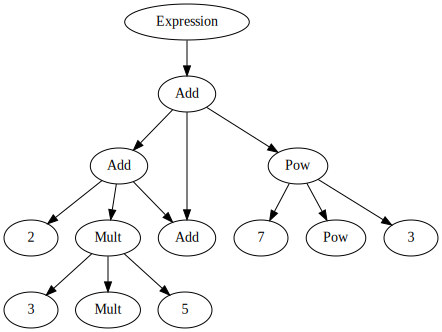

In [1]:
import ast
import graphviz
from IPython.display import display

class ExprTreeVisualizer:
    def __init__(self):
        self.graph = graphviz.Digraph()

    def parse_expression(self, expression):
        tree = ast.parse(expression, mode='eval')
        self.visualize(tree)

    def visualize(self, node, parent=None):
        if isinstance(node, ast.Module):
            self.visualize(node.body[0])
        elif isinstance(node, ast.Expr):
            self.visualize(node.value, parent)
        else:
            node_id = str(id(node))
            label = type(node).__name__
            if isinstance(node, ast.BinOp):
                label = type(node.op).__name__
            elif isinstance(node, ast.UnaryOp):
                label = type(node.op).__name__
            elif isinstance(node, ast.Num):
                label = str(node.n)
            elif isinstance(node, ast.Str):
                label = node.s
            elif isinstance(node, ast.Name):
                label = node.id
            elif isinstance(node, ast.Call):
                label = f"{node.func.id}()"

            self.graph.node(node_id, label)
            if parent:
                self.graph.edge(parent, node_id)

            for field, value in ast.iter_fields(node):
                if isinstance(value, list):
                    for item in value:
                        if isinstance(item, ast.AST):
                            self.visualize(item, node_id)
                elif isinstance(value, ast.AST):
                    self.visualize(value, node_id)

    def render(self):
        display(self.graph)


if __name__ == "__main__":
    expression = "2+3*5+7**3"
    visualizer = ExprTreeVisualizer()
    visualizer.parse_expression(expression)
    visualizer.render()
